<a href="https://colab.research.google.com/github/amit-eyal/campus_il_sql_course/blob/main/SqlExercise4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div dir=rtl align=center>

# <div dir="rtl"><font color='BLUE'><b>התנסו בכתיבת שאילתות SQL פשוטות
</b></font>
</div>

<div dir="rtl" align="center">
<b><font color="Grey">
<font color='#141C3A'>
 כתיבת פקודות SQL:
</div>

<div dir="rtl">
<font color="Grey">
מומלץ לשמור עותק של סביבת הקולאב במחשב שלכם, מכיוון שהזיכרון של הקונסולה האינטראקטיבית מתאפס כשמרעננים את עמוד האינטרנט בדפדפן.
<br>
בהצלחה!
</font>
</div>
<hr>

<div dir=rtl align=right>

## <div dir="rtl"><font color='BLUE'><b>חשוב להדגיש</b></font></div>
בעולם האמיתי, מידע של ארגונים מאוחסן במערכות RDBMS המוקמות על שרת מרוחק,
ועל מנת להריץ שאילתות SQL נצטרך להתחבר אל המערכת היושבת בשרת המרוחק.
למטרות למידה ותרגול, נשתמש בפתרון קל יותר, בעזרת ספריית SQLite נוכל להקים מסד נתונים מקומי בצורה מהירה ונוחה,
ולהריץ שאילתות SQL עליו באופן שדומה לעבודה עם מערכת RDBMS מלאה.

קיימות שיטות שונות להרצת שאילתות SQL בסביבת Google Colab (פלטפורמה מקוונת של גוגל לכתיבה והרצה של קוד בצורה אינטראקטיבית).
אנחנו נבחר להשתמש בספרייה בשם ipython-sql.
Ipython-sql הוא הרחבה ל-IPython, הוא מספק סביבת עבודה המאפשרת להריץ שאילתות SQL ישירות מתוך הסביבה (ללא שימוש בAPI שעוטף את הבקשות).
לאחר שטוענים את התוסף באמצעות הפקודה ```load_ext sql%```, ניתן להריץ שאילתות SQL ישירות מתוך סביבת העבודה.

2 יתרונות נוספים לשימוש בתוסף, התוסף מאפשר הדגשת תחביר והשלמת קוד SQL באופן אוטומטי.
דבר שהופך את חווית הכתיבה לנוחה וידידותית יותר.

</div>

<div dir=rtl align=right>

## <div dir="rtl"><font color='BLUE'><b>לפני הרצת שאילתות</b></font></div>


פשוט הריצו את הקטע הבא:
הכולל את התקנת הספרייה וטעינת התוסף sql
</div>

## Connetion

In [ ]:
!pip install sqlalchemy==1.4
!pip install ipython-sql
# load sql extention in order to use it above.
%load_ext sql
# change the design of the table result
%config SqlMagic.autopandas = True

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 59.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sqlalchemy: filename=SQLAlchemy-1.4.0-cp312-cp312-linux_x86_64.whl size=1490497 sha256=1c8cd4c4a8a37fcf96f7ff3b865628d163c241044817e3da4ebd1337decb8331
  Stored in directory: /root/.cache/pip/wheels/a6/b1/f8/f3401c8d8cde72a608b1399e8e0277aa542a70efd4defe44a5
Successfully built sqlalchemy
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.43
    Uninstalling SQLAlchemy-2.0.43:
      Successfully uninstalled SQLAlchemy-2.0.43
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4.0 which is incompatible.
google-adk 1.13.0 requires sqlalchemy<3.0.0,>=2.0, but you have sqlalchemy 1.4.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━

<div dir=rtl align=right>

## <div dir="rtl"><font color='BLUE'><b>טעינת הדאטה</b></font></div>

</div>


<div dir=rtl align=right>

הריצו את הפקודה הבאה:

``` "wget -O employees.sqlite3 "https://drive.google.com/uc?export=download&id=1ThJIPMRMlXOedWG2JIse0fod1wxc6XGu! ```

הפקודה תבצע הורדה של קובץ ה-DB של employees.sqlite3 ישירות ל-files שלכם.

<div dir=rtl align=center>

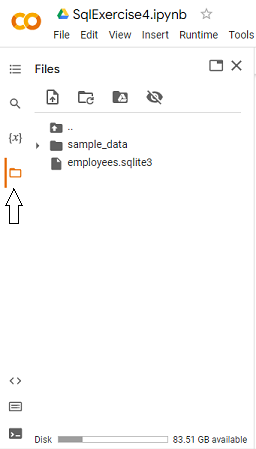
</div>

In [ ]:
!wget -O employees.sqlite3 "https://drive.google.com/uc?export=download&id=1ThJIPMRMlXOedWG2JIse0fod1wxc6XGu"

--2025-09-08 08:24:46--  https://drive.google.com/uc?export=download&id=1ThJIPMRMlXOedWG2JIse0fod1wxc6XGu
Resolving drive.google.com (drive.google.com)... 173.194.203.102, 173.194.203.113, 173.194.203.138, ...
Connecting to drive.google.com (drive.google.com)|173.194.203.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1ThJIPMRMlXOedWG2JIse0fod1wxc6XGu&export=download [following]
--2025-09-08 08:24:47--  https://drive.usercontent.google.com/download?id=1ThJIPMRMlXOedWG2JIse0fod1wxc6XGu&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.203.132, 2607:f8b0:400e:c05::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.203.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2097152 (2.0M) [application/octet-stream]
Saving to: ‘employees.sqlite3’

employees.sqlite3   100%[===================>]   2.00M 

<div dir=rtl align=right>

 ולבסוף הריצו את הפקודה הבאה:

`sql sqlite:///employees.sqlite3 %`


לאחר הרצת הפקודה נוצר חיבור לקובץ מסד הנתונים employees.sqlite3 של SQLite.

</div>

In [ ]:
%sql sqlite:///employees.sqlite3
%config SqlMagic.style = '_DEPRECATED_DEFAULT'

<div dir=rtl align=right>

סיימנו את שלב טעינת הנתונים למאגר!
כעת כל שאילתה שנעשה תרוץ מול הדאטה בייס (DB) של העובדים - employees.sqlite3 שהגדרנו!


<div dir="rtl">

# <div dir="rtl"><font color='BLUE'><b>דוגמא</b></font></div>

 שאילתה שמחזירה את כל המידע מטבלת employees

In [ ]:
%%sql
SELECT *
FROM employees

 * sqlite:///employees.sqlite3
Done.


,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10184,1957-05-22,Mihalis,Lowrie,M,1987-10-29
1,10264,1958-09-08,Nalini,Kawashimo,F,1997-07-16
2,10328,1955-06-28,Serenella,Kawashima,M,1994-01-16
3,10605,1956-05-21,Moti,Wixon,F,1985-04-29
4,10735,1964-09-12,Morrie,Gewali,M,1985-10-29
...,...,...,...,...,...,...
2432,499593,1964-01-31,Mantis,Kawashima,F,1990-07-16
2433,499668,1956-11-29,Kokou,Gewali,M,1991-06-12
2434,499695,1953-03-26,Srinidhi,Kawashimo,F,1989-06-07
2435,499731,1953-02-03,Yechezkel,Pews,F,1992-10-23


<div dir="rtl">

## <div dir="rtl"><font color='BLUE'><b>שאלה 1 -</b></font></div>

הציגו את כל השורות של הטבלה employees, כך שיופיעו רק השמות הפרטיים ושמות המשפחה של העובדות והעובדים.

In [ ]:
%%sql
#  .. כתוב/י כאן את השאילתה

 * sqlite:///employees.sqlite3
(sqlite3.OperationalError) unrecognized token: "#"
[SQL: #  .. כתוב/י כאן את השאילתה]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


<div dir="rtl">

## <div dir="rtl"><font color='BLUE'><b>שאלה 2 -</b></font></div>

הציגו את כל העובדות והעובדים שהתקבלו לעבודה לאחר 1 באוגוסט 1999 (לא-כולל).

In [ ]:
%%sql
#  .. כתוב/י כאן את השאילתה

 * sqlite:///employees.sqlite3
(sqlite3.OperationalError) unrecognized token: "#"
[SQL: #  .. כתוב/י כאן את השאילתה]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


<div dir="rtl">

## <div dir="rtl"><font color='BLUE'><b>שאלה 3 -</b></font></div>

במסד נתונים זה, שתי טבלאות הן מאותה סכמה. שלבו אותן באמצעות אופרטור איחוד (Union).


In [ ]:
%%sql
#  .. כתוב/י כאן את השאילתה

 * sqlite:///employees.sqlite3
(sqlite3.OperationalError) unrecognized token: "#"
[SQL: #  .. כתוב/י כאן את השאילתה]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


<div dir="rtl">

## <div dir="rtl"><font color='BLUE'><b>שאלה 4 -</b></font></div>

הציגו את המזהה (identifier) ואת המשכורות השונות של העובד או העובדת שנולדו בתאריך זה:  '1964-01-31', על ידי צירוף (join).


In [ ]:
%%sql
#  .. כתוב/י כאן את השאילתה

 * sqlite:///employees.sqlite3
(sqlite3.OperationalError) unrecognized token: "#"
[SQL: #  .. כתוב/י כאן את השאילתה]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


<div dir="rtl">

## <div dir="rtl"><font color='BLUE'><b>שאלה 5 -</b></font></div>

באמצעות האופרטור join, הפיקו טבלה המציינת את שמות המחלקות שבהן עבדו העובד או העובדת המשויכים למזהה 499902 (הטבלה חייבת להכיל גם את תאריכי ההתחלה והסיום של ההעסקה בכל מחלקה, וכן שם המשפחה והשם הפרטי של העובד/ת).


In [ ]:
%%sql
#  .. כתוב/י כאן את השאילתה

 * sqlite:///employees.sqlite3
(sqlite3.OperationalError) unrecognized token: "#"
[SQL: #  .. כתוב/י כאן את השאילתה]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


<div dir="rtl">

## <div dir="rtl"><font color='BLUE'><b>שאלה 6 -</b></font></div>

על ידי קיבוץ (אגרגציה), גלו כמה אנשים נושאים את שם המשפחה "Gewali" (שם המשפחה נתון בעמודה last_name של הטבלה "employees").


In [ ]:
%%sql
#  .. כתוב/י כאן את השאילתה

 * sqlite:///employees.sqlite3
(sqlite3.OperationalError) unrecognized token: "#"
[SQL: #  .. כתוב/י כאן את השאילתה]
(Background on this error at: https://sqlalche.me/e/20/e3q8)
